**Irfan Musa** <br>
**PYTN-KS11-019**

**Bangun model menggunakan Logistic Regression, KNN, SVM, Naive Bayes, Decision Tree, dan Random Forest.**

# A. Import Library

In [62]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [63]:
conda install -c conda-forge imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://repo.anaconda.com/pkgs/main/win-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.

If your current network has https://www.anaconda.com blocked, please file
a support request with your network engineering team.

'https//repo.anaconda.com/pkgs/main/win-64'




In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.tree as tree
import pydotplus
import imblearn
from sklearn.neighbors import KNeighborsClassifier
from six import StringIO
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

# for ignove warning
import warnings
warnings.filterwarnings('ignore')

# B. Data Collection and Preprocessing Data

In [96]:
#Upload dataset
df = pd.read_csv('bank-full.csv', sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### This dataset contains:

**bank client data**:
- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no', 'yes', 'unknown')
- housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
- loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

**related with the last contact of the current campaign**:
- contact: contact communication type (categorical: 'cellular', 'telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes**:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

**Output variable (desired target)**:
- y : has the client subscribed a term deposit? (binary: 'yes','no')

Sumber data : https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [97]:
# Rename column y menjadi column target
df_bank = df.rename(columns={'y':'Client_Subscribed'})
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Client_Subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# C. Data Exploration

In [98]:
df_bank.shape

(45211, 17)

In [99]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   job                45211 non-null  object
 2   marital            45211 non-null  object
 3   education          45211 non-null  object
 4   default            45211 non-null  object
 5   balance            45211 non-null  int64 
 6   housing            45211 non-null  object
 7   loan               45211 non-null  object
 8   contact            45211 non-null  object
 9   day                45211 non-null  int64 
 10  month              45211 non-null  object
 11  duration           45211 non-null  int64 
 12  campaign           45211 non-null  int64 
 13  pdays              45211 non-null  int64 
 14  previous           45211 non-null  int64 
 15  poutcome           45211 non-null  object
 16  Client_Subscribed  45211 non-null  objec

In [100]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# E. Data Cleaning

In [101]:
df_bank.isna().sum()

age                  0
job                  0
marital              0
education            0
default              0
balance              0
housing              0
loan                 0
contact              0
day                  0
month                0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
Client_Subscribed    0
dtype: int64

In [102]:
df_bank.dtypes

age                   int64
job                  object
marital              object
education            object
default              object
balance               int64
housing              object
loan                 object
contact              object
day                   int64
month                object
duration              int64
campaign              int64
pdays                 int64
previous              int64
poutcome             object
Client_Subscribed    object
dtype: object

Diperhatikan bahwa terdapat beberapa kolom yang data typenya tidak sesuai. Selanjutnya, akan disesuaikan data type tersebut.

In [94]:
# ubah type data menjadi categorical
#categorical = ['job','marital','education','default','housing','loan','month','contact','poutcome','Client_Subscribed']

#for col in categorical: 
#    df_bank[col] = df_bank[col].astype('category')
#df_bank.dtypes

In [103]:
df_bank['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

# Visualisasi Data
**Akan ditunjukkan bagaimana perbandingan keputusan client untuk bergabung dengan program berlangganan deposito**

In [104]:
A_1 = pd.DataFrame({"Jumlah data":df_bank['Client_Subscribed'].value_counts()})
A_1

,Jumlah data
no,39922
yes,5289


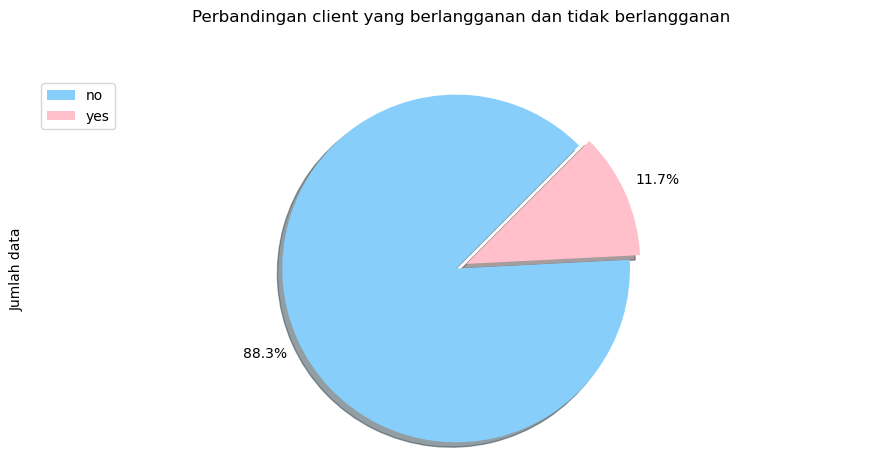

In [105]:
Jumlah_data = A_1["Jumlah data"]
colors_list = ['lightskyblue','pink']
explode_list = [0.015, 0.05]

Jumlah_data.plot(kind='pie',
        figsize=(11,5),
        autopct='%1.1f%%',
        startangle=45,
        shadow=True,
        labels=None,
        pctdistance=1.2,
        colors=colors_list,
        explode=explode_list)
plt.legend(labels=Jumlah_data.index,loc='upper left')
plt.axis('equal')
plt.title('Perbandingan client yang berlangganan dan tidak berlangganan',y=1.12)
plt.show()

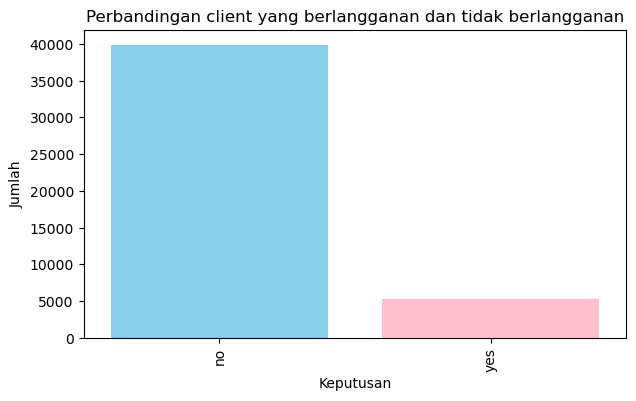

In [106]:
label=["YES","NO"]
Jumlah_data.plot(kind="bar", figsize=(7,4))
plt.bar(label,Jumlah_data, color=['skyblue', 'pink',])
plt.title('Perbandingan client yang berlangganan dan tidak berlangganan') #judul
plt.xlabel("Keputusan")
plt.ylabel("Jumlah")
plt.show() #tampilkan

In [107]:
#creating labelEncoder

#preprocessing.LabelEncoder() digunakan untuk membuat objek LabelEncoder yang akan digunakan untuk melakukan encoding pada setiap kolom.
label_encoder = preprocessing.LabelEncoder()

#mengambil tipe data object pada dataset dan di simpan di dfbank
df_category = df_bank.select_dtypes(include='object')
df_new = df_bank.copy()

for column in df_category.columns:
    df_new[column] = label_encoder.fit_transform(df_bank[column])

In [108]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                45211 non-null  int64
 1   job                45211 non-null  int32
 2   marital            45211 non-null  int32
 3   education          45211 non-null  int32
 4   default            45211 non-null  int32
 5   balance            45211 non-null  int64
 6   housing            45211 non-null  int32
 7   loan               45211 non-null  int32
 8   contact            45211 non-null  int32
 9   day                45211 non-null  int64
 10  month              45211 non-null  int32
 11  duration           45211 non-null  int64
 12  campaign           45211 non-null  int64
 13  pdays              45211 non-null  int64
 14  previous           45211 non-null  int64
 15  poutcome           45211 non-null  int32
 16  Client_Subscribed  45211 non-null  int32
dtypes: int32(10)

**Pada percobaan pertama didapatkan hasil yang kurang baik, yaitu banyak nilai-nilai f-1 score, macro avg, dan weighted avg yang kurang dari 70% maka pada percobaan kali ini ditambahkan Undersampling**

In [112]:
from sklearn.utils import resample
imblearn.under_sampling.RandomUnderSampler
#create two different dataframe of majority and minority class 
df_majority = df_new[(df_new['Client_Subscribed']==0)] 
df_minority = df_new[(df_new['Client_Subscribed']==1)] 
# upsample minority class
df_majority_undersampling = resample(df_majority, replace = True, n_samples = 5289, random_state = 42)
# Combine majority class with upsampled minority class
df_undersampling = pd.concat([df_majority_undersampling, df_minority]) 
df_undersampling

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Client_Subscribed
16514,42,9,2,1,0,2646,1,0,0,23,5,280,4,-1,0,3,0
876,37,11,2,3,0,414,1,0,2,7,8,131,1,-1,0,3,0
41667,54,4,2,2,0,2081,0,0,0,1,10,395,2,108,1,0,0
11710,58,9,1,1,0,683,0,0,2,20,6,157,2,-1,0,3,0
6465,30,4,1,1,0,-397,1,0,2,27,8,141,3,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,5,1,1,0,2850,0,0,0,17,9,300,1,40,8,0,1
45205,25,9,2,1,0,505,0,1,0,17,9,386,2,-1,0,3,1
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1


In [113]:
df_undersampling['Client_Subscribed'].value_counts()

0    5289
1    5289
Name: Client_Subscribed, dtype: int64

Data disesuaikan dengan minoritas data yang ada. Selanjutnya data akan distandarisasi dan dilanjutkan modelling.

In [117]:
# membuat objek StandardScaler utuk melakukan scaling pada setiap kolom numerik
scaler = preprocessing.StandardScaler()
scale_df = df_undersampling.copy()

# setiap kolom diubah nilainya dengan method fit_trasnform() dan hasilnya disimpan pada scale_df.
numeric_df = df_undersampling.select_dtypes(include=['int64','int32'])
for column in numeric_df.columns:
  scale_df[column] = scaler.fit_transform(df_undersampling[column].values.reshape(-1,1))
scale_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Client_Subscribed
16514,0.053404,1.397834,1.271204,-0.390782,-0.119529,0.340521,1.065478,-0.38621,-0.588447,0.892191,-0.137454,-0.282314,0.587816,-0.488503,-0.379111,0.527119,-1.0
876,-0.363998,2.018676,1.271204,2.285613,-0.119529,-0.347588,1.065478,-0.38621,1.870893,-1.015405,0.800804,-0.707775,-0.567358,-0.488503,-0.379111,0.527119,-1.0
41667,1.055171,-0.154271,1.271204,0.947416,-0.119529,0.166335,-0.938546,-0.38621,-0.588447,-1.730754,1.426309,0.046062,-0.182300,0.506320,0.073921,-2.439291,-1.0
11710,1.389093,1.397834,-0.319568,-0.390782,-0.119529,-0.264657,-0.938546,-0.38621,1.870893,0.534516,0.175299,-0.633533,-0.182300,-0.488503,-0.379111,0.527119,-1.0
6465,-0.948362,-0.154271,-0.319568,-0.390782,-0.119529,-0.597613,1.065478,-0.38621,1.870893,1.369090,0.800804,-0.679220,0.202758,-0.488503,-0.379111,0.527119,-1.0


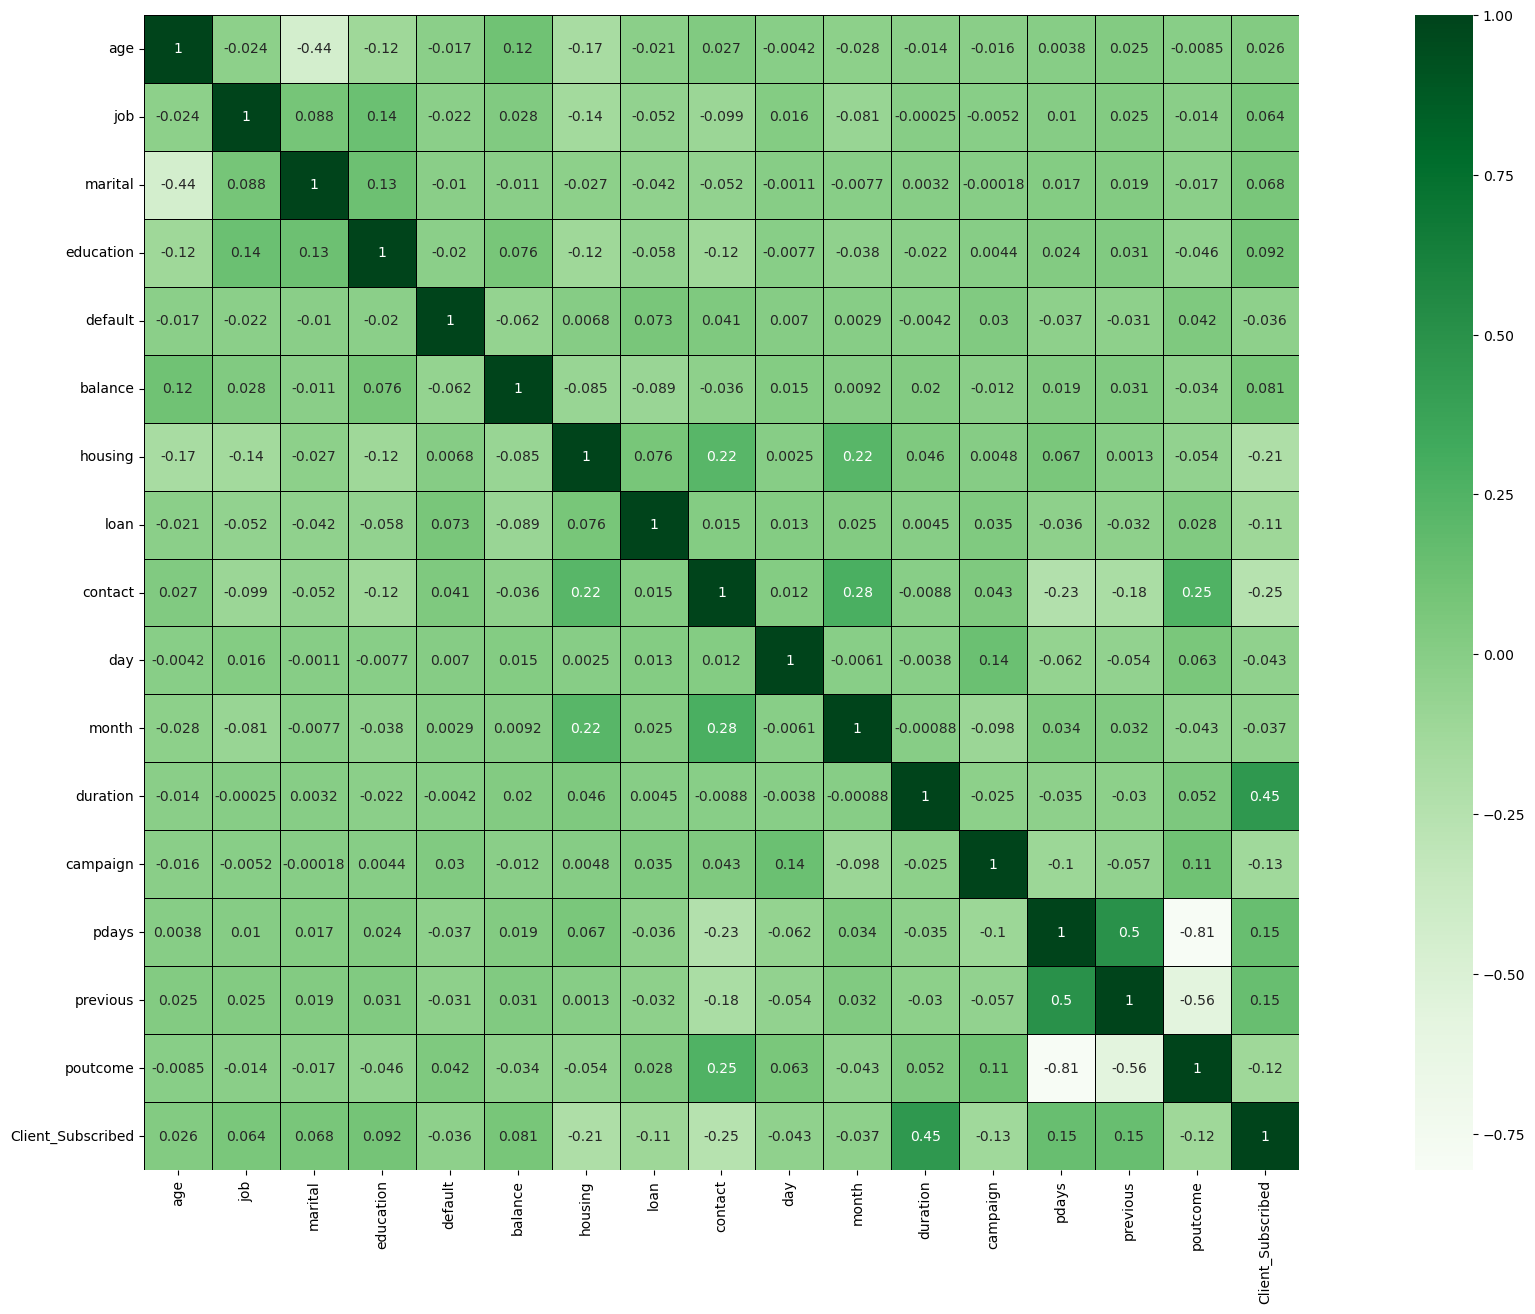

In [122]:
# annot=True digunakan untuk menampilkan nilai korelasi pada setiap kotak pada heatmap
plt.figure(figsize=(30, 15))
ax = sns.heatmap(scale_df.corr(), annot=True, cmap='Greens', linewidths=0.5, linecolor='black', square=True)

# Logistic Regression

In [123]:
#Data split
from sklearn.model_selection import train_test_split
feature_col_names = ['age', 'job', 'marital', 'education', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'poutcome']
predicted_class_names = ['Client_Subscribed']

x = df_undersampling[feature_col_names].values
y = df_undersampling[predicted_class_names].values
split_test_size = 0.25

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=1)
df_undersampling

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Client_Subscribed
16514,42,9,2,1,0,2646,1,0,0,23,5,280,4,-1,0,3,0
876,37,11,2,3,0,414,1,0,2,7,8,131,1,-1,0,3,0
41667,54,4,2,2,0,2081,0,0,0,1,10,395,2,108,1,0,0
11710,58,9,1,1,0,683,0,0,2,20,6,157,2,-1,0,3,0
6465,30,4,1,1,0,-397,1,0,2,27,8,141,3,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,5,1,1,0,2850,0,0,0,17,9,300,1,40,8,0,1
45205,25,9,2,1,0,505,0,1,0,17,9,386,2,-1,0,3,1
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1


In [124]:
# Melihat jumlah 0 pada masing-masing kolom
print("- rows in dataframe {0}".format(len(df_undersampling)))
print("- rows missing age: {0}".format(len(df_undersampling.loc[df_undersampling['age'] == 0])))
print("- rows missing job: {0}".format(len(df_undersampling.loc[df_undersampling['job'] == 0])))
print("- rows missing marital: {0}".format(len(df_undersampling.loc[df_undersampling['marital'] == 0])))
print("- rows missing education: {0}".format(len(df_undersampling.loc[df_undersampling['education'] == 0])))
#print("- rows missing default: {0}".format(len(df_undersampling.loc[df_undersampling['default'] == 0])))
print("- rows missing balance: {0}".format(len(df_undersampling.loc[df_undersampling['balance'] == 0])))
#print("- rows missing housing: {0}".format(len(df_undersampling.loc[df_undersampling['housing'] == 0])))
#print("- rows missing loan: {0}".format(len(df_undersampling.loc[df_undersampling['loan'] == 0])))
#print("- rows missing contact: {0}".format(len(df_undersampling.loc[df_undersampling['contact'] == 0])))
print("- rows missing day: {0}".format(len(df_undersampling.loc[df_undersampling['day'] == 0])))
print("- rows missing month: {0}".format(len(df_undersampling.loc[df_undersampling['month'] == 0])))
print("- rows missing duration: {0}".format(len(df_undersampling.loc[df_undersampling['duration'] == 0])))
print("- rows missing campaign: {0}".format(len(df_undersampling.loc[df_undersampling['campaign'] == 0])))
print("- rows missing pdays: {0}".format(len(df_undersampling.loc[df_undersampling['pdays'] == 0])))
#print("- rows missing previous: {0}".format(len(df_undersampling.loc[df_undersampling['previous'] == 0])))
print("- rows missing poutcome: {0}".format(len(df_undersampling.loc[df_undersampling['poutcome'] == 0])))

- rows in dataframe 10578
- rows missing age: 0
- rows missing job: 1239
- rows missing marital: 1241
- rows missing education: 1384
- rows missing balance: 732
- rows missing day: 0
- rows missing month: 869
- rows missing duration: 1
- rows missing campaign: 0
- rows missing pdays: 0
- rows missing poutcome: 1199


Berdasarkan hasil diatas diketahui bahwa banyak data yang memiliki 0 value. Selanjutnya, dikarenakan total data merupakan 10578 baris dan terdapat paling banyak 1384 baris data yang menjadi missing value maka pada kasus ini missing value akan diabaikan. Akibatnya, kolom yang digunakan merupakan kolom yang sudah dilakukan drop.

In [125]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train.ravel())

LogisticRegression()

In [132]:
lr_predict_test = lr_model.predict(x_test)
from sklearn import metrics
print('lr preedict test = ', lr_predict_test)
print('y_test = ', y_test)
print('Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_test, lr_predict_test)))

lr preedict test =  [0 1 0 ... 0 1 1]
y_test =  [[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]
Accuracy: 0.7372


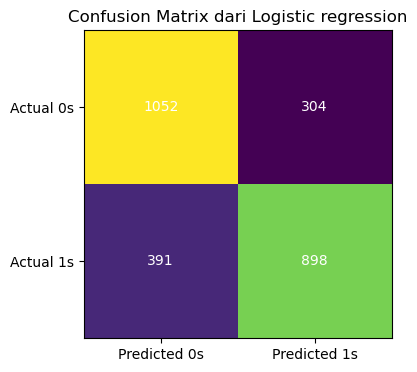

In [135]:
confMLR = confusion_matrix(y_test, lr_predict_test)

fig,ax = plt.subplots(figsize=(4,4))
plt.title('Confusion Matrix dari Logistic regression')
ax.imshow(confMLR)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,confMLR[i,j],ha='center',va='center',color='white')
plt.show()

Berdasarkan confusion matriks diatas, diperoleh hasil sebagai berikut.
- Terdapat 1052 nasabah yang diprediksi tidak melakukan deposito dan kenyataannya tidak melakukan deposito (True Negative)
- Terdapat 391 nasabah yang diprediksi tidak melakukan deposito dan kenyataannya melakukan deposito (False Negative)
- Terdapat 898 nasabah yang diprediksi melakukan deposito dan kenyataannya tidak melakukan deposito (True Positive)
- Terdapat 304 nasabah yang diprediksi melakukan deposito dan kenyataannya melakukan deposito (False Positive) <br>
<br>
Selanjutnya, akan ditunjukkan perhitungan evaluation matriksnya <br>

**Perhitungan** <br>
- Akurasi = $\frac{TP + TN}{n}$
- Prediksi = $\frac{TP}{TP + FP}$
- Recall = $\frac{TP}{TP + FN}$
- F1 = $\frac{2TP}{2TP + FP + FN}$


In [140]:
#Evaluasi manual
TN = 1052
FN = 391
FP = 304 
TP = 898

acc = (TP+TN)/(TP+FP+TN+FN)
pre = (TP) / (TP+FP)
re = (TP) /(TP+FN)
f1  = 2*TP/(TP+FP+TP+FN)
print('Akurasi : ',acc)
print('Presisi : ',pre)
print('Recall : ',re)
print('F1 : ',f1)

Akurasi :  0.7372400756143668
Presisi :  0.7470881863560732
Recall :  0.6966640806826998
F1 :  0.72099558410277


In [142]:
#Evaluasi lainnya
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
print(" ")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Confusion Matrix
[[1052  304]
 [ 391  898]]
 
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.78      0.75      1356
           1       0.75      0.70      0.72      1289

    accuracy                           0.74      2645
   macro avg       0.74      0.74      0.74      2645
weighted avg       0.74      0.74      0.74      2645



# KNN

In [ ]:
#Data split
from sklearn.model_selection import train_test_split
feature_col_names = ['age', 'job', 'marital', 'education', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'poutcome']
predicted_class_names = ['Client_Subscribed']

x = df_undersampling[feature_col_names].values
y = df_undersampling[predicted_class_names].values
split_test_size = 0.25

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=1)

#model training
KNN_model = KNeighborsClassifier()
KNN_model.fit(x_train, y_train.ravel())

#Mengevaluasi model data train
KNN_predict_train = KNN_model.predict(x_train)

from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, KNN_predict_train)))

#Mengevaluasi model data test
KNN_predict_test = KNN_model.predict(x_test)
from sklearn import metrics

print("KNN_predict_test", KNN_predict_test)
print("y_test", y_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, KNN_predict_test)))

confMLR_2 = confusion_matrix(y_test, KNN_predict_test)

fig,ax = plt.subplots(figsize=(4,4))
plt.title('Confusion Matrix dari KNN')
ax.imshow(confMLR_2)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,confMLR[i,j],ha='center',va='center',color='white')
plt.show()

#confusion matrix
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, KNN_predict_test)))
print(" ")
print("Classification Report")
print(metrics.classification_report(y_test, KNN_predict_test))

# Naive Bayes

Accuracy: 0.7110
NB_predict_test [0 1 0 ... 0 1 1]
y_test [[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]
Accuracy: 0.7172


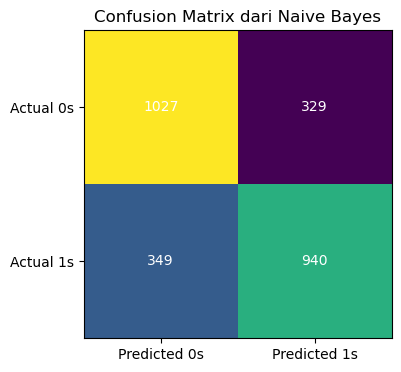

Confusion Matrix
[[1106  250]
 [ 498  791]]
 
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.82      0.75      1356
           1       0.76      0.61      0.68      1289

    accuracy                           0.72      2645
   macro avg       0.72      0.71      0.71      2645
weighted avg       0.72      0.72      0.71      2645



In [160]:
#Data split
from sklearn.model_selection import train_test_split
feature_col_names = ['age', 'job', 'marital', 'education', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'poutcome']
predicted_class_names = ['Client_Subscribed']

x = df_undersampling[feature_col_names].values
y = df_undersampling[predicted_class_names].values
split_test_size = 0.25
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=1)

#model training
NB_model = GaussianNB()
NB_model.fit(x_train, y_train.ravel())

#Mengevaluasi model data train
NB_predict_train = NB_model.predict(x_train)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, NB_predict_train)))

#Mengevaluasi model data test
NB_predict_test = NB_model.predict(x_test)
print("NB_predict_test", NB_predict_test)
print("y_test", y_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, NB_predict_test)))

confMLR_3 = confusion_matrix(y_test, NB_predict_test)

fig,ax = plt.subplots(figsize=(4,4))
plt.title('Confusion Matrix dari Naive Bayes')
ax.imshow(confMLR_3)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,confMLR[i,j],ha='center',va='center',color='white')
plt.show()

#confusion matrix
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, NB_predict_test)))
print(" ")
print("Classification Report")
print(metrics.classification_report(y_test, NB_predict_test))

# Decision Tree

Accuracy: 1.0000
NB_predict_test [0 1 0 ... 1 1 0]
y_test [[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]
Accuracy: 0.7879


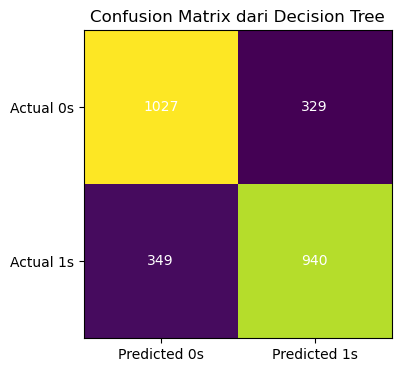

Confusion Matrix
[[1087  269]
 [ 292  997]]
 
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1356
           1       0.79      0.77      0.78      1289

    accuracy                           0.79      2645
   macro avg       0.79      0.79      0.79      2645
weighted avg       0.79      0.79      0.79      2645



In [159]:
#Data split
from sklearn.model_selection import train_test_split
feature_col_names = ['age', 'job', 'marital', 'education', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'poutcome']
predicted_class_names = ['Client_Subscribed']

x = df_undersampling[feature_col_names].values
y = df_undersampling[predicted_class_names].values
split_test_size = 0.25
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=1)

#model training
destree_model = DecisionTreeClassifier()
destree_model.fit(x_train, y_train.ravel())

#Mengevaluasi model data train
destree_predict_train = destree_model.predict(x_train)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, destree_predict_train)))

#Mengevaluasi model data test
destree_predict_test = destree_model.predict(x_test)
print("NB_predict_test", destree_predict_test)
print("y_test", y_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, destree_predict_test)))

confMLR_4 = confusion_matrix(y_test, destree_predict_test)

fig,ax = plt.subplots(figsize=(4,4))
plt.title('Confusion Matrix dari Decision Tree')
ax.imshow(confMLR_4)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,confMLR[i,j],ha='center',va='center',color='white')
plt.show()

#confusion matrix
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, destree_predict_test)))
print(" ")
print("Classification Report")
print(metrics.classification_report(y_test, destree_predict_test))

# Random Forest

Accuracy: 1.0000
NB_predict_test [0 1 0 ... 1 0 0]
y_test [[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]
Accuracy: 0.8529


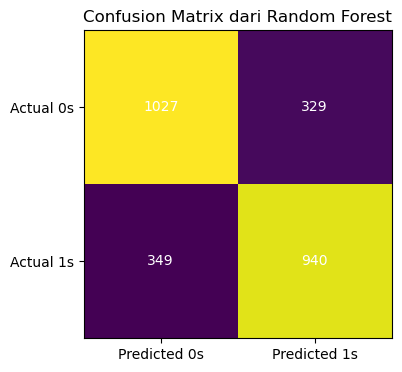

Confusion Matrix
[[1149  207]
 [ 182 1107]]
 
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1356
           1       0.84      0.86      0.85      1289

    accuracy                           0.85      2645
   macro avg       0.85      0.85      0.85      2645
weighted avg       0.85      0.85      0.85      2645



In [163]:
#Data split
from sklearn.model_selection import train_test_split
feature_col_names = ['age', 'job', 'marital', 'education', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'poutcome']
predicted_class_names = ['Client_Subscribed']

x = df_undersampling[feature_col_names].values
y = df_undersampling[predicted_class_names].values
split_test_size = 0.25
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=1)

#model training
RF_model = RandomForestClassifier(n_estimators=100)
RF_model.fit(x_train, y_train.ravel())

#Mengevaluasi model data train
RF_predict_train = RF_model.predict(x_train)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, RF_predict_train)))

#Mengevaluasi model data test
RF_predict_test = RF_model.predict(x_test)
print("NB_predict_test", RF_predict_test)
print("y_test", y_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, RF_predict_test)))

confMLR_5 = confusion_matrix(y_test, RF_predict_test)

fig,ax = plt.subplots(figsize=(4,4))
plt.title('Confusion Matrix dari Random Forest')
ax.imshow(confMLR_5)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,confMLR[i,j],ha='center',va='center',color='white')
plt.show()

#confusion matrix
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, RF_predict_test)))
print(" ")
print("Classification Report")
print(metrics.classification_report(y_test, RF_predict_test))

# SVM

In [ ]:
#Data split
from sklearn.model_selection import train_test_split
feature_col_names = ['age', 'job', 'marital', 'education', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'poutcome']
predicted_class_names = ['Client_Subscribed']

x = df_undersampling[feature_col_names].values
y = df_undersampling[predicted_class_names].values
split_test_size = 0.25
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=1)

#model training
SVM_model = SVC(kernel='linear')
SVM_model.fit(x_train, y_train.ravel())

#Mengevaluasi model data train
SVC_predict_train = SVC_model.predict(x_train)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, SVC_predict_train)))

#Mengevaluasi model data test
SVC_predict_test = SVC_model.predict(x_test)
print("NB_predict_test", SVC_predict_test)
print("y_test", y_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, SVC_predict_test)))

confMLR_6 = confusion_matrix(y_test, SVC_predict_test)

fig,ax = plt.subplots(figsize=(4,4))
plt.title('Confusion Matrix dari Support Vector Machine')
ax.imshow(confMLR_6)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,confMLR[i,j],ha='center',va='center',color='white')
plt.show()

#confusion matrix
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, SVC_predict_test)))
print(" ")
print("Classification Report")
print(metrics.classification_report(y_test, SVC_predict_test))

**Analisis singkat** <br>
Berdasarkan hasil-hasil yang diperoleh dapat disimpulkan sementara bahwa metode $Random Forest$ lebih efektif karena memiliki nilai akurasi pada (y_test, y_pred_test) dan (y_train, y_pred_train) paling tinggi diantara metode-metode lainnya. Dilain sisi, dalam hal kefleksibelan metode $KNN$ lebih baik karena kita dapat memilih sendiri nilai k. Akan tetapi, secara keseluruhan metode $Logistic Regression$ jadi pilihan terbaik dikarenakan metodenya cukup sederhana dan bisa memberikan hasil yang cukup akurat serta interpretasi yang jelas terkait pengaruhnya variabel input terhadap probabilitas output.